In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../../churn-prediction/customers_data.csv')

In [3]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


# Data preparation

In [4]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [5]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

str_cols = list(df.dtypes[df.dtypes == 'object'].index)

for col in str_cols:
    df[col] = df[col].str.lower().str.replace(" ", "_")

In [6]:
df.head(3).T

,0,1,2
customerid,7590-vhveg,5575-gnvde,3668-qpybk
gender,female,male,male
seniorcitizen,0,0,0
partner,yes,no,no
dependents,no,no,no
tenure,1,34,2
phoneservice,no,yes,yes
multiplelines,no_phone_service,no,no
internetservice,dsl,dsl,dsl
onlinesecurity,no,yes,yes


In [7]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [8]:
df.totalcharges

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: totalcharges, Length: 7043, dtype: object

In [9]:
pd.to_numeric(df.totalcharges)

ValueError: Unable to parse string "_" at position 488

In [15]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [16]:
df.totalcharges.isnull().sum()

11

In [18]:
df[df.totalcharges.isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges
488,4472-lvygi,NaN
753,3115-czmzd,NaN
936,5709-lvoeq,NaN
1082,4367-nuyao,NaN
1340,1371-dwpaz,NaN
3331,7644-omvmy,NaN
3826,3213-vvolg,NaN
4380,2520-sgtta,NaN
5218,2923-arzlg,NaN
6670,4075-wkniu,NaN


In [19]:
df.totalcharges = df.totalcharges.fillna(0)

In [20]:
(df.churn == 'yes').head(3)

0    False
1    False
2     True
Name: churn, dtype: bool

In [21]:
df.churn = (df.churn == 'yes').astype(int)

# Validation framework

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
train_test_split?

In [24]:
full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_valid = train_test_split(full_train, test_size=0.25, random_state=1)

In [25]:
len(full_train), len(df_test)

(5634, 1409)

In [26]:
len(df_train), len(df_valid)

(4225, 1409)

In [27]:
y_test = df_test.churn.values
y_valid = df_valid.churn.values
y_train = df_train.churn.values

In [28]:
df_train = df_train.reset_index(drop=True)
df_valid = df_valid.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)

In [29]:
del df_test['churn']
del df_valid['churn']
del df_train['churn']

# EDA

In [30]:
full_train = full_train.reset_index(drop=True)

In [31]:
full_train.head(2)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.7,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.9,3160.55,1


In [32]:
full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [33]:
full_train.churn.value_counts()

0    4113
1    1521
Name: churn, dtype: int64

In [34]:
full_train.churn.value_counts(normalize=True)

0    0.730032
1    0.269968
Name: churn, dtype: float64

In [35]:
(1521/(4113 + 1521)) * 100
# 27 % is churning customers

26.996805111821086

In [36]:
# But we can use `.mean()` which will do the same.
# Because mean is: sum of all values: (0 + 1 + ..)/number of all values.
# As we have 0 in some rows => nothing will be added and 1 denotes
# churning, hence overall result gives us churning number of customers.
global_churn = full_train.churn.mean()

In [37]:
round(global_churn, 2)

0.27

In [38]:
full_train.dtypes
# although `seniorcitizen` is denoted as int64, it's not
# actually numerical, but categorical.
# Considering REAL numerical variables,
# there're 3: tenure/monthlycharges/totalcharges

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [39]:
list(full_train.columns)

['customerid',
 'gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'tenure',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'monthlycharges',
 'totalcharges',
 'churn']

In [40]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
               'phoneservice', 'multiplelines', 'internetservice',
               'onlinesecurity', 'onlinebackup', 'deviceprotection',
               'techsupport', 'streamingtv', 'streamingmovies',
               'contract', 'paperlessbilling', 'paymentmethod']

In [41]:
full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

# Feature importance

In [42]:
churn_feamle = full_train[full_train.gender == 'female'].churn.mean()

In [43]:
churn_male = full_train[full_train.gender == 'male'].churn.mean()

In [44]:
global_churn = full_train.churn.mean()
global_churn

0.26996805111821087

In [45]:
full_train.partner.value_counts()

no     2932
yes    2702
Name: partner, dtype: int64

In [46]:
yes_partner = full_train[full_train.partner == 'yes'].churn.mean()
no_partner = full_train[full_train.partner == 'no'].churn.mean()

In [47]:
no_partner, yes_partner

(0.3298090040927694, 0.20503330866025166)

In [48]:
no_partner / global_churn, yes_partner / global_churn

(1.2216593879412643, 0.7594724924338315)

In [49]:
full_train.groupby('gender').churn.mean().to_frame()

,churn
gender,
female,0.276824
male,0.263214


In [50]:
# same as above
df_group = full_train.groupby('gender').churn.agg(['mean', 'count'])
df_group

,mean,count
gender,,
female,0.276824,2796
male,0.263214,2838


In [51]:
df_group['diff'] = df_group['mean'] - global_churn
df_group['risk'] = df_group['mean'] / global_churn

In [52]:
df_group

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


In [53]:
from IPython.display import display

In [54]:
# But doing above is mundane, let's use loop with display().
# By obsering data this way we can pick up so-called
# 'discriminative features'

for col in categorical:
    print(col)
    df_group = full_train.groupby(col).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean'] / global_churn
    display(df_group)

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208


partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472


dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651


phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412


multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948


internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201


onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570


onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660


deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480


techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390


streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328


streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182


contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730


paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560


paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


# Mutual info

In [55]:
from sklearn.metrics import mutual_info_score

In [56]:
mutual_info_score(full_train.churn, full_train.contract)
# order doesn't matter

0.0983203874041556

In [57]:
mutual_info_score(full_train.churn, full_train.gender)

0.0001174846211139946

In [58]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, full_train.churn)

In [64]:
result = full_train[categorical].apply(mutual_info_churn_score)

result.sort_values(ascending=False).to_frame('Mut. info')

,Mut. info
contract,0.098320
onlinesecurity,0.063085
techsupport,0.061032
internetservice,0.055868
onlinebackup,0.046923
deviceprotection,0.043453
paymentmethod,0.043210
streamingtv,0.031853
streamingmovies,0.031581
paperlessbilling,0.017589


# Correlation

In [67]:
full_train[numerical].corrwith(full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [69]:
full_train[full_train.tenure <= 2].churn.mean()

0.5953420669577875

In [71]:
full_train[(full_train.tenure > 2) & (full_train.tenure <= 12)].churn.mean()

0.3994413407821229

In [72]:
full_train[full_train.tenure > 12].churn.mean()

0.17634908339788277

In [73]:
full_train[full_train.monthlycharges <= 20].churn.mean()

0.08795411089866156

In [74]:
full_train[(full_train.monthlycharges > 20) & (full_train.monthlycharges < 50)].churn.mean()

0.1836890243902439

In [75]:
full_train[full_train.monthlycharges > 50].churn.mean()

0.32499341585462205

In [78]:
full_train[numerical].corrwith(full_train.churn).abs()
# removes minus if we want to see IMPORTANCE (not direction)

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

# One-hot encoding

In [79]:
from sklearn.feature_extraction import DictVectorizer

In [88]:
dicts = full_train[['gender', 'contract', 'tenure']].iloc[:10].to_dict(orient='records')

In [89]:
dv = DictVectorizer(sparse=False)

In [90]:
dv.fit(dicts)

DictVectorizer(sparse=False)

In [91]:
dv.get_feature_names()
# it shows columns that are encoded and where row's data
# meets column name => 1 else 0.

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'gender=female',
 'gender=male',
 'tenure']

In [92]:
dv.transform(dicts)

array([[ 0.,  0.,  1.,  0.,  1., 12.],
       [ 0.,  1.,  0.,  1.,  0., 42.],
       [ 0.,  0.,  1.,  0.,  1., 71.],
       [ 0.,  1.,  0.,  0.,  1., 71.],
       [ 0.,  1.,  0.,  0.,  1., 30.],
       [ 1.,  0.,  0.,  1.,  0.,  9.],
       [ 0.,  0.,  1.,  0.,  1., 72.],
       [ 1.,  0.,  0.,  0.,  1., 28.],
       [ 1.,  0.,  0.,  0.,  1.,  6.],
       [ 1.,  0.,  0.,  1.,  0., 47.]])

In [93]:
train_dicts = full_train[numerical + categorical].to_dict(orient='records')

In [94]:
dv = DictVectorizer(sparse=False)

In [95]:
dv.fit(train_dicts)

DictVectorizer(sparse=False)

In [96]:
dv.get_feature_names()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

In [99]:
list(dv.transform(train_dicts[:5])[0])
# first row

[0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 19.7,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 12.0,
 258.35]

In [100]:
X_shape = dv.transform(train_dicts)

In [103]:
valid_dicts = df_valid[numerical + categorical].to_dict(orient='records')

X_valid = dv.transform(valid_dicts)

In [104]:
X_valid

array([[0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 1.0000e+00, 7.1000e+01,
        4.9734e+03],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        2.0750e+01],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        2.0350e+01],
       ...,
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 1.8000e+01,
        1.0581e+03],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        9.3300e+01],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 3.0000e+00,
        2.9285e+02]])

# Logistic Regression

![alt text](sigmoid.jpg)

![alt text](sigmoid2.jpg)

In [107]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [120]:
z = np.linspace(-7, 5, 51)
z

array([-7.  , -6.76, -6.52, -6.28, -6.04, -5.8 , -5.56, -5.32, -5.08,
       -4.84, -4.6 , -4.36, -4.12, -3.88, -3.64, -3.4 , -3.16, -2.92,
       -2.68, -2.44, -2.2 , -1.96, -1.72, -1.48, -1.24, -1.  , -0.76,
       -0.52, -0.28, -0.04,  0.2 ,  0.44,  0.68,  0.92,  1.16,  1.4 ,
        1.64,  1.88,  2.12,  2.36,  2.6 ,  2.84,  3.08,  3.32,  3.56,
        3.8 ,  4.04,  4.28,  4.52,  4.76,  5.  ])

In [121]:
sigmoid(z)

array([9.11051194e-04, 1.15788692e-03, 1.47150060e-03, 1.86989753e-03,
       2.37590057e-03, 3.01841632e-03, 3.83402011e-03, 4.86893124e-03,
       6.18146089e-03, 7.84502303e-03, 9.95180187e-03, 1.26171607e-02,
       1.59848483e-02, 2.02329971e-02, 2.55807883e-02, 3.22954647e-02,
       4.06990536e-02, 5.11737009e-02, 6.41638764e-02, 8.01729122e-02,
       9.97504891e-02, 1.23467048e-01, 1.51871164e-01, 1.85427419e-01,
       2.24435986e-01, 2.68941421e-01, 3.18646266e-01, 3.72852234e-01,
       4.30453776e-01, 4.90001333e-01, 5.49833997e-01, 6.08259031e-01,
       6.63738697e-01, 7.15042106e-01, 7.61332715e-01, 8.02183889e-01,
       8.37534937e-01, 8.67611126e-01, 8.92831930e-01, 9.13725806e-01,
       9.30861580e-01, 9.44799462e-01, 9.56060185e-01, 9.65108591e-01,
       9.72347578e-01, 9.78118729e-01, 9.82706843e-01, 9.86346341e-01,
       9.89228270e-01, 9.91507137e-01, 9.93307149e-01])

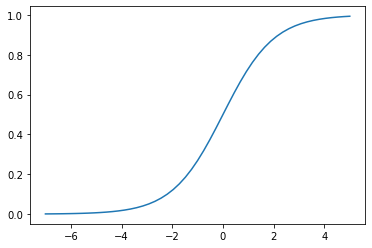

In [122]:
plt.plot(z, sigmoid(z))

In [123]:
def linear_regression(xi):
    result = w0
    
    for j in range(len(w)):
        result += xi[j] * w[j]
    
    return result

In [124]:
def linear_regression(xi):
    score = w0
    
    for j in range(len(w)):
        score += xi[j] * w[j]
    
    return sigmoid(score)